In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("21.csv")

In [3]:
df

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2072-09-29,44,30180,587,Employed,High School,19,24521,36,Married,...,2515.000000,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0
19996,2072-09-30,56,49246,567,Employed,Associate,33,25818,36,Married,...,4103.833333,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0
19997,2072-10-01,44,48958,645,Employed,Bachelor,20,37033,72,Married,...,4079.833333,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0
19998,2072-10-02,60,41025,560,Employed,High School,36,14760,72,Married,...,3418.750000,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0


In [4]:
df.drop(columns="ApplicationDate", inplace=True)  #removing the date

In [5]:
df.isnull().sum()  #no missing values found

Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate              0
InterestRate                  0
MonthlyL

In [6]:
df.duplicated().sum()  #no duplicates found

0

In [7]:
df.describe()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,39.752600,59161.473550,571.612400,17.522750,24882.867800,54.057000,1.517300,454.292700,0.286381,3.023350,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.766780
std,11.622713,40350.845168,50.997358,11.316836,13427.421217,24.664857,1.386325,240.507609,0.159793,1.736161,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.778262
min,18.000000,15000.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000974,0.000000,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,28.800000
25%,32.000000,31679.000000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,0.160794,2.000000,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,40.000000,48566.000000,578.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,0.266673,3.000000,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,48.000000,74391.000000,609.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,0.390634,4.000000,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000
max,80.000000,485341.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,0.917380,13.000000,...,25000.000000,0.999433,16.000000,2.603208e+06,0.405029,0.446787,10892.629520,4.647657,1.000000,84.000000


In [8]:
df.dtypes

Age                             int64
AnnualIncome                    int64
CreditScore                     int64
EmploymentStatus               object
EducationLevel                 object
Experience                      int64
LoanAmount                      int64
LoanDuration                    int64
MaritalStatus                  object
NumberOfDependents              int64
HomeOwnershipStatus            object
MonthlyDebtPayments             int64
CreditCardUtilizationRate     float64
NumberOfOpenCreditLines         int64
NumberOfCreditInquiries         int64
DebtToIncomeRatio             float64
BankruptcyHistory               int64
LoanPurpose                    object
PreviousLoanDefaults            int64
PaymentHistory                  int64
LengthOfCreditHistory           int64
SavingsAccountBalance           int64
CheckingAccountBalance          int64
TotalAssets                     int64
TotalLiabilities                int64
MonthlyIncome                 float64
UtilityBills

# Strings to Int

In [9]:
print("EmpStatus:\t",df["EmploymentStatus"].unique())
print("Education:\t",df["EducationLevel"].unique())
print("MaritalSt:\t",df["MaritalStatus"].unique())
print("HomeOwnership:\t",df["HomeOwnershipStatus"].unique())
print("LoanPurpose:\t",df["LoanPurpose"].unique())

EmpStatus:	 ['Employed' 'Self-Employed' 'Unemployed']
Education:	 ['Master' 'Associate' 'Bachelor' 'High School' 'Doctorate']
MaritalSt:	 ['Married' 'Single' 'Divorced' 'Widowed']
HomeOwnership:	 ['Own' 'Mortgage' 'Rent' 'Other']
LoanPurpose:	 ['Home' 'Debt Consolidation' 'Education' 'Other' 'Auto']


In [10]:
strDf = df.copy()

In [11]:
strDf["EmploymentStatus"] = np.where(strDf["EmploymentStatus"] == "Employed", 0, strDf["EmploymentStatus"])
strDf["EmploymentStatus"] = np.where(strDf["EmploymentStatus"] == "Self-Employed", 1, strDf["EmploymentStatus"])
strDf["EmploymentStatus"] = np.where(strDf["EmploymentStatus"] == "Unemployed", 2, strDf["EmploymentStatus"])
strDf["EmploymentStatus"] = strDf["EmploymentStatus"].astype(int)

strDf["EducationLevel"] = np.where(strDf["EducationLevel"] == "Master", 0, strDf["EducationLevel"])
strDf["EducationLevel"] = np.where(strDf["EducationLevel"] == "Associate", 1, strDf["EducationLevel"])
strDf["EducationLevel"] = np.where(strDf["EducationLevel"] == "Bachelor", 2, strDf["EducationLevel"])
strDf["EducationLevel"] = np.where(strDf["EducationLevel"] == "High School", 3, strDf["EducationLevel"])
strDf["EducationLevel"] = np.where(strDf["EducationLevel"] == "Doctorate", 4, strDf["EducationLevel"])
strDf["EducationLevel"] = strDf["EducationLevel"].astype(int)

strDf["MaritalStatus"] = np.where(strDf["MaritalStatus"] == "Married", 0, strDf["MaritalStatus"])
strDf["MaritalStatus"] = np.where(strDf["MaritalStatus"] == "Single", 1, strDf["MaritalStatus"])
strDf["MaritalStatus"] = np.where(strDf["MaritalStatus"] == "Divorced", 2, strDf["MaritalStatus"])
strDf["MaritalStatus"] = np.where(strDf["MaritalStatus"] == "Widowed", 3, strDf["MaritalStatus"])
strDf["MaritalStatus"] = strDf["MaritalStatus"].astype(int)

strDf["HomeOwnershipStatus"] = np.where(strDf["HomeOwnershipStatus"] == "Own", 0, strDf["HomeOwnershipStatus"])
strDf["HomeOwnershipStatus"] = np.where(strDf["HomeOwnershipStatus"] == "Mortgage", 1, strDf["HomeOwnershipStatus"])
strDf["HomeOwnershipStatus"] = np.where(strDf["HomeOwnershipStatus"] == "Rent", 2, strDf["HomeOwnershipStatus"])
strDf["HomeOwnershipStatus"] = np.where(strDf["HomeOwnershipStatus"] == "Other", 3, strDf["HomeOwnershipStatus"])
strDf["HomeOwnershipStatus"] = strDf["HomeOwnershipStatus"].astype(int)

strDf["LoanPurpose"] = np.where(strDf["LoanPurpose"] == "Home", 0, strDf["LoanPurpose"])
strDf["LoanPurpose"] = np.where(strDf["LoanPurpose"] == "Debt Consolidation", 1, strDf["LoanPurpose"])
strDf["LoanPurpose"] = np.where(strDf["LoanPurpose"] == "Education", 2, strDf["LoanPurpose"])
strDf["LoanPurpose"] = np.where(strDf["LoanPurpose"] == "Other", 3, strDf["LoanPurpose"])
strDf["LoanPurpose"] = np.where(strDf["LoanPurpose"] == "Auto", 4, strDf["LoanPurpose"])
strDf["LoanPurpose"] = strDf["LoanPurpose"].astype(int)

In [12]:
strDf.to_csv("./IntClasses/Str_To_Int.csv", index=False)

# One-Hot Classifications

In [13]:
df = pd.get_dummies(df, columns=["EmploymentStatus"], prefix=["EmpStat"], dtype=int)
df = pd.get_dummies(df, columns=["EducationLevel"], prefix=["EdLevel"], dtype=int)
df = pd.get_dummies(df, columns=["MaritalStatus"], prefix=["MaritalStat"], dtype=int)
df = pd.get_dummies(df, columns=["HomeOwnershipStatus"], prefix=["HomeStat"], dtype=int)
df = pd.get_dummies(df, columns=["LoanPurpose"], prefix=["LoanPurpose"], dtype=int)

df = df[[col for col in df.columns if col != "LoanApproved"] + ["LoanApproved"]]
df = df[[col for col in df.columns if col != "RiskScore"] + ["RiskScore"]]

df.to_csv("./One-Hot/One-Hot.csv", index=False)

# Boxplot

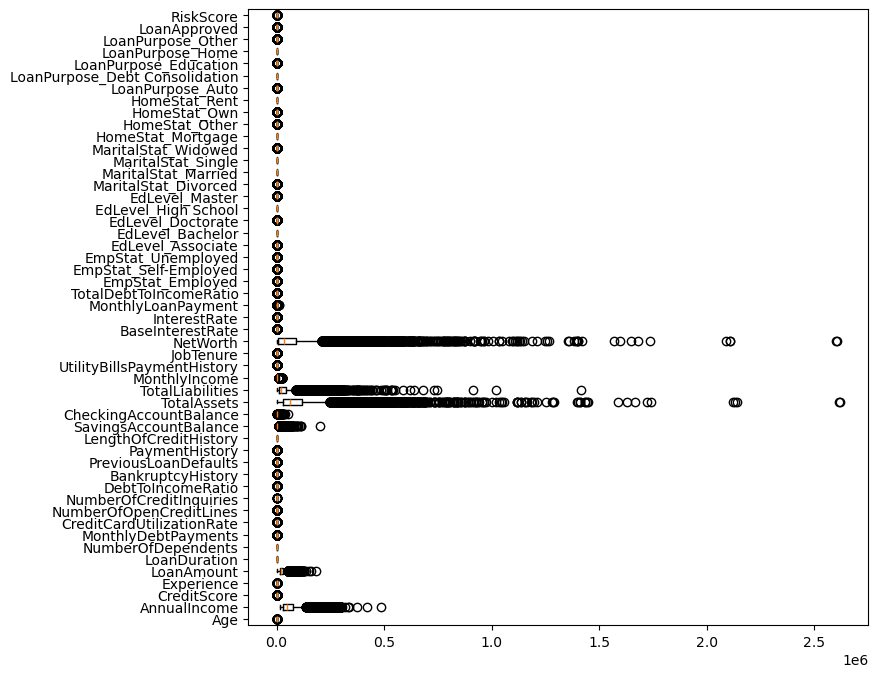

In [14]:
plt.figure(figsize=(8, 8))
plt.boxplot(df, vert=False)
plt.yticks(range(1, len(df.columns)+1), df.columns)
plt.show()

# Splitting

In [15]:
X_train_OH, X_temp_OH, y_train_OH, y_temp_OH = train_test_split(df.iloc[:,:-2], df.iloc[:,-2:], test_size=0.4, stratify=df["LoanApproved"], random_state=42)
X_valid_OH, X_test_OH, y_valid_OH, y_test_OH = train_test_split(X_temp_OH, y_temp_OH, test_size=0.5, stratify=y_temp_OH["LoanApproved"], random_state=42)

In [16]:
train_OH = pd.concat([X_train_OH, y_train_OH], axis=1)
valid_OH = pd.concat([X_valid_OH, y_valid_OH], axis=1)
test_OH = pd.concat([X_test_OH, y_test_OH], axis=1)

In [17]:
train_OH.to_csv("./One-Hot/Train_Orig_OH.csv", index=False)
valid_OH.to_csv("./One-Hot/Valid_Orig_OH.csv", index=False)
test_OH.to_csv("./One-Hot/Test_Orig_OH.csv", index=False)

In [18]:
X_train_Int, X_temp_Int, y_train_Int, y_temp_Int = train_test_split(strDf.iloc[:,:-2], strDf.iloc[:,-2:], test_size=0.4, stratify=df["LoanApproved"], random_state=42)
X_valid_Int, X_test_Int, y_valid_Int, y_test_Int = train_test_split(X_temp_Int, y_temp_Int, test_size=0.5, stratify=y_temp_Int["LoanApproved"], random_state=42)

train_Int = pd.concat([X_train_Int, y_train_Int], axis=1)
valid_Int = pd.concat([X_valid_Int, y_valid_Int], axis=1)
test_Int = pd.concat([X_test_Int, y_test_Int], axis=1)

train_Int.to_csv("./IntClasses/Train_Orig_Int.csv", index=False)
valid_Int.to_csv("./IntClasses/Valid_Orig_Int.csv", index=False)
test_Int.to_csv("./IntClasses/Test_Orig_Int.csv", index=False)

# Scaling

### For Integer Classes

#### Only continuous values scaled

In [19]:
train_Int.columns

Index(['Age', 'AnnualIncome', 'CreditScore', 'EmploymentStatus',
       'EducationLevel', 'Experience', 'LoanAmount', 'LoanDuration',
       'MaritalStatus', 'NumberOfDependents', 'HomeOwnershipStatus',
       'MonthlyDebtPayments', 'CreditCardUtilizationRate',
       'NumberOfOpenCreditLines', 'NumberOfCreditInquiries',
       'DebtToIncomeRatio', 'BankruptcyHistory', 'LoanPurpose',
       'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory',
       'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets',
       'TotalLiabilities', 'MonthlyIncome', 'UtilityBillsPaymentHistory',
       'JobTenure', 'NetWorth', 'BaseInterestRate', 'InterestRate',
       'MonthlyLoanPayment', 'TotalDebtToIncomeRatio', 'LoanApproved',
       'RiskScore'],
      dtype='object')

In [20]:
columns_to_remove = ['EmploymentStatus', 'EducationLevel', 'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose', 'LoanApproved']
remaining_columns = [col for col in train_Int.columns if col not in columns_to_remove]

In [21]:
remaining_columns

['Age',
 'AnnualIncome',
 'CreditScore',
 'Experience',
 'LoanAmount',
 'LoanDuration',
 'NumberOfDependents',
 'MonthlyDebtPayments',
 'CreditCardUtilizationRate',
 'NumberOfOpenCreditLines',
 'NumberOfCreditInquiries',
 'DebtToIncomeRatio',
 'BankruptcyHistory',
 'PreviousLoanDefaults',
 'PaymentHistory',
 'LengthOfCreditHistory',
 'SavingsAccountBalance',
 'CheckingAccountBalance',
 'TotalAssets',
 'TotalLiabilities',
 'MonthlyIncome',
 'UtilityBillsPaymentHistory',
 'JobTenure',
 'NetWorth',
 'BaseInterestRate',
 'InterestRate',
 'MonthlyLoanPayment',
 'TotalDebtToIncomeRatio',
 'RiskScore']

In [22]:
scaler = StandardScaler()
for col in remaining_columns:
    scaler.fit(train_Int[col].values.reshape(-1, 1))
    train_Int[col] = scaler.transform(train_Int[col].values.reshape(-1, 1)).flatten()
    valid_Int[col] = scaler.transform(valid_Int[col].values.reshape(-1, 1)).flatten()
    test_Int[col] = scaler.transform(test_Int[col].values.reshape(-1, 1)).flatten()

In [23]:
train_Int.to_csv("./IntClasses/Scaled/Train_Scaled_Cont_Int.csv", index=False)
valid_Int.to_csv("./IntClasses/Scaled/Valid_Scaled_Cont_Int.csv", index=False)
test_Int.to_csv("./IntClasses/Scaled/Test_Scaled_Cont_Int.csv", index=False)

#### All values scaled

In [24]:
for col in columns_to_remove:
    scaler.fit(train_Int[col].values.reshape(-1, 1))
    train_Int[col] = scaler.transform(train_Int[col].values.reshape(-1, 1)).flatten()
    valid_Int[col] = scaler.transform(valid_Int[col].values.reshape(-1, 1)).flatten()
    test_Int[col] = scaler.transform(test_Int[col].values.reshape(-1, 1)).flatten()

In [25]:
train_Int.to_csv("./IntClasses/Scaled/Train_Scaled_All_Int.csv", index=False)
valid_Int.to_csv("./IntClasses/Scaled/Valid_Scaled_All_Int.csv", index=False)
test_Int.to_csv("./IntClasses/Scaled/Test_Scaled_All_Int.csv", index=False)

### For One-Hot Classes

#### Only continuous values scaled

In [26]:
for col in remaining_columns:
    scaler.fit(train_OH[col].values.reshape(-1, 1))
    train_OH[col] = scaler.transform(train_OH[col].values.reshape(-1, 1)).flatten()
    valid_OH[col] = scaler.transform(valid_OH[col].values.reshape(-1, 1)).flatten()
    test_OH[col] = scaler.transform(test_OH[col].values.reshape(-1, 1)).flatten()

In [27]:
train_OH.to_csv("./One-Hot/Scaled/Train_Scaled_Cont_OH.csv", index=False)
valid_OH.to_csv("./One-Hot/Scaled/Valid_Scaled_Cont_OH.csv", index=False)
test_OH.to_csv("./One-Hot/Scaled/Test_Scaled_Cont_OH.csv", index=False)

#### All values scaled

In [28]:
for col in train_OH.columns:
    if col not in remaining_columns:
        scaler.fit(train_OH[col].values.reshape(-1, 1))
        train_OH[col] = scaler.transform(train_OH[col].values.reshape(-1, 1)).flatten()
        valid_OH[col] = scaler.transform(valid_OH[col].values.reshape(-1, 1)).flatten()
        test_OH[col] = scaler.transform(test_OH[col].values.reshape(-1, 1)).flatten()

In [29]:
train_OH.to_csv("./One-Hot/Scaled/Train_Scaled_All_OH.csv", index=False)
valid_OH.to_csv("./One-Hot/Scaled/Valid_Scaled_All_OH.csv", index=False)
test_OH.to_csv("./One-Hot/Scaled/Test_Scaled_All_OH.csv", index=False)

# Min-Max Normalizing

### For Integer Classes

In [30]:
scaler = MinMaxScaler()

train_Int_Orig = pd.read_csv("./IntClasses/Train_Orig_Int.csv")
valid_Int_Orig = pd.read_csv("./IntClasses/Valid_Orig_Int.csv")
test_Int_Orig = pd.read_csv("./IntClasses/Test_Orig_Int.csv")

In [31]:
scaler.fit(strDf)

MinMaxScaler()

In [32]:
train_Int_MM = train_Int_Orig.copy()
valid_Int_MM = valid_Int_Orig.copy()
test_Int_MM = test_Int_Orig.copy()

train_Int_MM[train_Int_Orig.columns] = scaler.transform(train_Int_Orig[train_Int_Orig.columns])
valid_Int_MM[train_Int_Orig.columns] = scaler.transform(valid_Int_Orig[train_Int_Orig.columns])
test_Int_MM[train_Int_Orig.columns] = scaler.transform(test_Int_Orig[train_Int_Orig.columns])

In [33]:
train_Int_MM.to_csv("./IntClasses/MinMax/Train_MM_Int.csv")
test_Int_MM.to_csv("./IntClasses/MinMax/Test_MM_Int.csv")
valid_Int_MM.to_csv("./IntClasses/MinMax/Valid_MM_Int.csv")

### For One-Hot Classes

In [34]:
train_OH_Orig = pd.read_csv("./One-Hot/Train_Orig_OH.csv")
valid_OH_Orig = pd.read_csv("./One-Hot/Valid_Orig_OH.csv")
test_OH_Orig = pd.read_csv("./One-Hot/Test_Orig_OH.csv")
df = pd.read_csv("./One-Hot/One-Hot.csv")

In [35]:
scaler.fit(df)

MinMaxScaler()

In [36]:
train_OH_MM = train_OH_Orig.copy()
valid_OH_MM = valid_OH_Orig.copy()
test_OH_MM = test_OH_Orig.copy()

train_OH_MM[train_OH_Orig.columns] = scaler.transform(train_OH_Orig[train_OH_Orig.columns])
valid_OH_MM[train_OH_Orig.columns] = scaler.transform(valid_OH_Orig[train_OH_Orig.columns])
test_OH_MM[train_OH_Orig.columns] = scaler.transform(test_OH_Orig[train_OH_Orig.columns])

In [37]:
train_OH_MM.to_csv("./One-Hot/MinMax/Train_MM_OH.csv")
test_OH_MM.to_csv("./One-Hot/MinMax/Test_MM_OH.csv")
valid_OH_MM.to_csv("./One-Hot/MinMax/Valid_MM_OH.csv")

# PCA

### For Integer Classes

In [48]:
pca = PCA()

In [49]:
pca.fit(train_Int_MM.drop("LoanApproved", axis=1))

PCA()

In [50]:
pca.explained_variance_ratio_

array([1.17074061e-01, 7.81485297e-02, 7.57887978e-02, 7.51460185e-02,
       7.33541591e-02, 6.99029858e-02, 6.67399398e-02, 6.50723875e-02,
       6.28579421e-02, 5.19600119e-02, 4.54278877e-02, 2.96965130e-02,
       2.61520474e-02, 2.46319029e-02, 2.22298470e-02, 2.18028253e-02,
       1.66029801e-02, 1.62579785e-02, 1.50896347e-02, 1.47179916e-02,
       9.15357154e-03, 6.09043019e-03, 5.48343928e-03, 2.99716050e-03,
       1.70222374e-03, 1.54584258e-03, 1.36419075e-03, 1.01144353e-03,
       9.29400478e-04, 4.98617725e-04, 4.72559912e-04, 7.43487987e-05,
       2.23297595e-05, 2.30887874e-32])

In [51]:
pca.explained_variance_ratio_.size

34

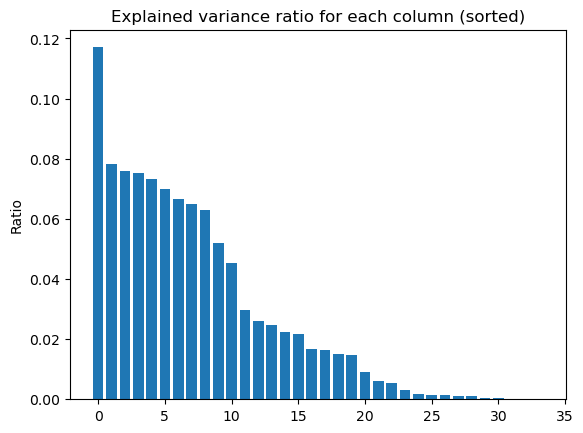

In [52]:
plt.bar(range(pca.explained_variance_ratio_.size), pca.explained_variance_ratio_)
plt.title("Explained variance ratio for each column (sorted)")
plt.ylabel("Ratio")
plt.show()

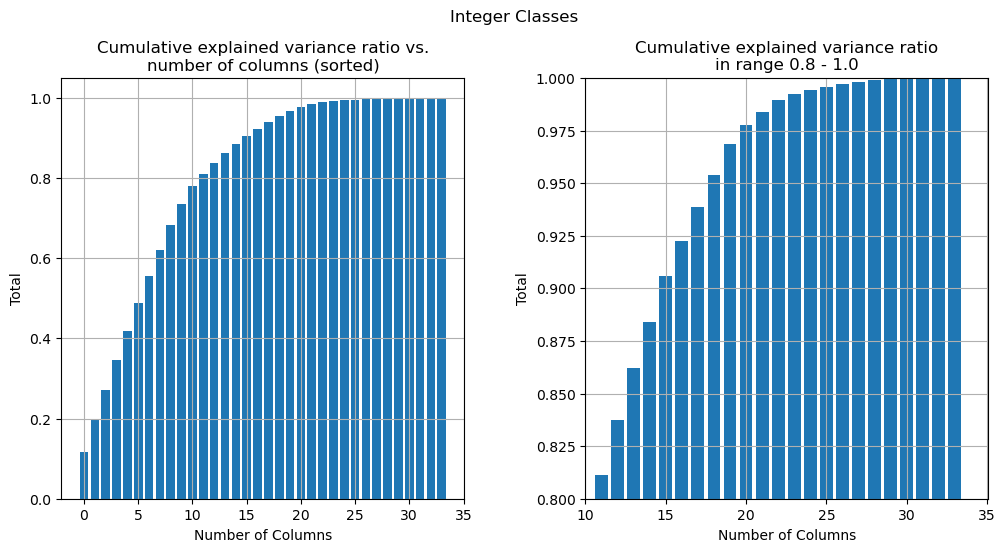

In [53]:
figure, axes = plt.subplots(1,2)
figure.set_figwidth(10)

varRatioSum = 0
sumList = []
for var in pca.explained_variance_ratio_:
    varRatioSum = varRatioSum+var
    sumList.append(varRatioSum)

figure.tight_layout()
figure.suptitle("Integer Classes", y=1.1)
    
axes[0].bar(range(pca.explained_variance_ratio_.size), sumList)
axes[0].set_title("Cumulative explained variance ratio vs.\nnumber of columns (sorted)")
axes[0].set_ylabel("Total")
axes[0].set_xlabel("Number of Columns")
axes[0].grid()

axes[1].bar(range(pca.explained_variance_ratio_.size), sumList)
axes[1].set_title("Cumulative explained variance ratio\nin range 0.8 - 1.0")
axes[1].set_ylabel("Total")
axes[1].set_xlabel("Number of Columns")
axes[1].set_ylim(0.8,1)
axes[1].set_xlim(10)
axes[1].grid()

plt.subplots_adjust(wspace=0.3)
plt.show()

In [60]:
n_list = [10, 15, 20, 25]
for n in n_list:
    pca = PCA(n_components=n)
    pca.fit(train_Int_MM.drop("LoanApproved", axis=1))
    
    train_PCA = pca.transform(train_Int_MM.drop("LoanApproved", axis=1))
    train_PCA = pd.DataFrame(train_PCA, columns=[f"PC{i+1}" for i in range(n)])
    train_PCA['LoanApproved'] = train_Int_MM['LoanApproved']
    
    valid_PCA = pca.transform(valid_Int_MM.drop("LoanApproved", axis=1))
    valid_PCA = pd.DataFrame(valid_PCA, columns=[f"PC{i+1}" for i in range(n)])
    valid_PCA['LoanApproved'] = valid_Int_MM['LoanApproved']
    
    test_PCA = pca.transform(test_Int_MM.drop("LoanApproved", axis=1))
    test_PCA = pd.DataFrame(test_PCA, columns=[f"PC{i+1}" for i in range(n)])
    test_PCA['LoanApproved'] = test_Int_MM['LoanApproved']
    
    train_PCA.to_csv(f"./IntClasses/MinMax/train_Int_MM_PCA{n}.csv", index=False)
    valid_PCA.to_csv(f"./IntClasses/MinMax/valid_Int_MM_PCA{n}.csv", index=False)
    test_PCA.to_csv(f"./IntClasses/MinMax/test_Int_MM_PCA{n}.csv", index=False)

### For One-Hot Classes

[1.00561045e-01 9.19061546e-02 7.87564843e-02 7.17521510e-02
 6.05800523e-02 5.97624413e-02 5.78867866e-02 4.96679418e-02
 4.75353056e-02 4.33552174e-02 4.25587897e-02 3.04156267e-02
 2.89201438e-02 2.40632825e-02 2.33448894e-02 2.08879794e-02
 2.01838697e-02 1.90048674e-02 1.64459469e-02 1.61553449e-02
 1.52257281e-02 1.39769759e-02 9.02661021e-03 8.01135724e-03
 7.34841739e-03 6.87314770e-03 6.72568129e-03 5.14262150e-03
 5.03366419e-03 4.66962639e-03 4.55820660e-03 2.80445293e-03
 1.88402026e-03 1.69635771e-03 9.27678972e-04 5.22318227e-04
 4.78840320e-04 4.18789404e-04 3.12794256e-04 2.87692246e-04
 1.54395962e-04 1.46369551e-04 2.30179875e-05 6.91560020e-06
 1.98321692e-32 1.74454179e-33 1.62120857e-33 1.28964324e-33
 1.23010314e-33 1.60108819e-34]


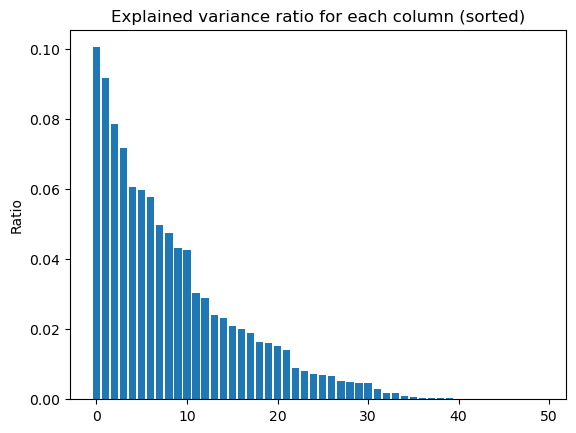

In [44]:
pca = PCA()
pca.fit(train_OH_MM.drop("LoanApproved", axis=1))
print(pca.explained_variance_ratio_)

plt.bar(range(pca.explained_variance_ratio_.size), pca.explained_variance_ratio_)
plt.title("Explained variance ratio for each column (sorted)")
plt.ylabel("Ratio")
plt.show()

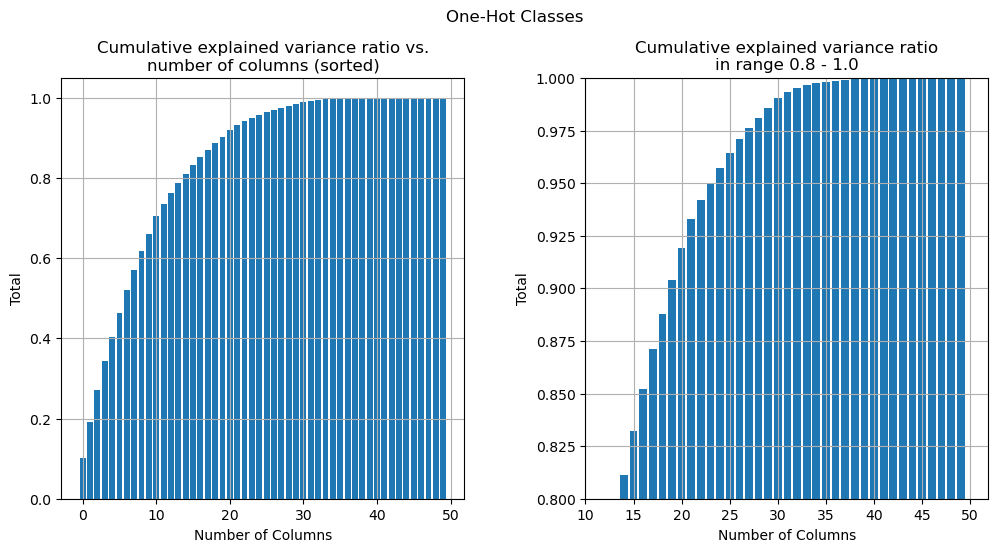

In [47]:
figure, axes = plt.subplots(1,2)
figure.set_figwidth(10)

varRatioSum = 0
sumList = []
for var in pca.explained_variance_ratio_:
    varRatioSum = varRatioSum+var
    sumList.append(varRatioSum)

figure.tight_layout()
figure.suptitle("One-Hot Classes", y=1.1)
    
axes[0].bar(range(pca.explained_variance_ratio_.size), sumList)
axes[0].set_title("Cumulative explained variance ratio vs.\nnumber of columns (sorted)")
axes[0].set_ylabel("Total")
axes[0].set_xlabel("Number of Columns")
axes[0].grid()

axes[1].bar(range(pca.explained_variance_ratio_.size), sumList)
axes[1].set_title("Cumulative explained variance ratio\nin range 0.8 - 1.0")
axes[1].set_ylabel("Total")
axes[1].set_xlabel("Number of Columns")
axes[1].set_ylim(0.8,1)
axes[1].set_xlim(10)
axes[1].grid()

plt.subplots_adjust(wspace=0.3)
plt.show()

In [61]:
n_list = [15, 20, 25, 30, 35]
for n in n_list:
    pca = PCA(n_components=n)
    pca.fit(train_OH_MM.drop("LoanApproved", axis=1))
    
    train_PCA = pca.transform(train_OH_MM.drop("LoanApproved", axis=1))
    train_PCA = pd.DataFrame(train_PCA, columns=[f"PC{i+1}" for i in range(n)])
    train_PCA['LoanApproved'] = train_OH_MM['LoanApproved']
    
    valid_PCA = pca.transform(valid_OH_MM.drop("LoanApproved", axis=1))
    valid_PCA = pd.DataFrame(valid_PCA, columns=[f"PC{i+1}" for i in range(n)])
    valid_PCA['LoanApproved'] = valid_OH_MM['LoanApproved']
    
    test_PCA = pca.transform(test_OH_MM.drop("LoanApproved", axis=1))
    test_PCA = pd.DataFrame(test_PCA, columns=[f"PC{i+1}" for i in range(n)])
    test_PCA['LoanApproved'] = test_OH_MM['LoanApproved']
    
    train_PCA.to_csv(f"./One-Hot/MinMax/train_OH_MM_PCA{n}.csv", index=False)
    valid_PCA.to_csv(f"./One-Hot/MinMax/valid_OH_MM_PCA{n}.csv", index=False)
    test_PCA.to_csv(f"./One-Hot/MinMax/test_OH_MM_PCA{n}.csv", index=False)